In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/haram4th/ablearn/main/Taitanic_train.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
data.isna().sum() / len(data) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

### 1. 'Cabin' 컬럼은 결측치가 너무 많아서 분석대상에서 제외

In [6]:
data = data.drop('Cabin', axis=1)

In [7]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### 2. 'Age' 컬럼 결측값 처리: 중앙값으로 채우기

In [8]:
data['Age']=data['Age'].fillna(round(data['Age'].median()))

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [10]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


### ---------------결측값 처리 완료------------------------------

### EDA

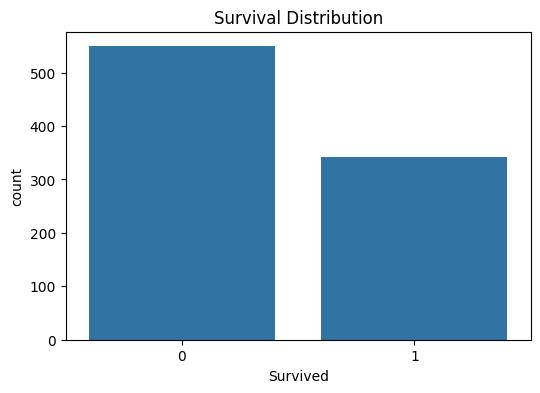

In [12]:
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', data=data)
plt.title('Survival Distribution')
plt.show()

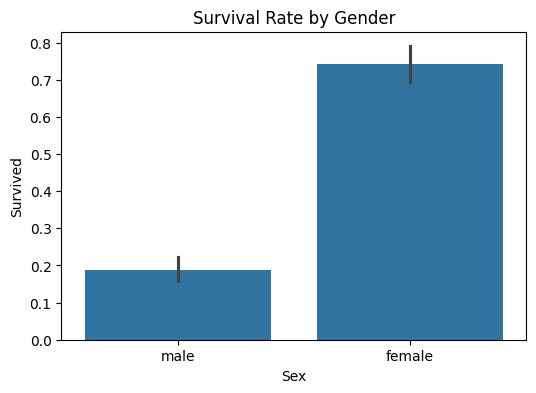

In [13]:
plt.figure(figsize=(6,4))
sns.barplot(x='Sex', y='Survived', data=data)
plt.title('Survival Rate by Gender')
plt.show()

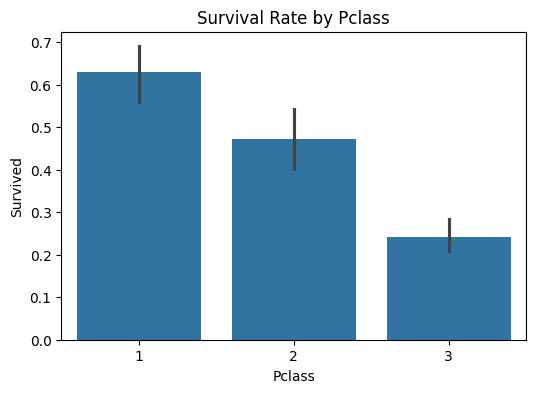

In [14]:
plt.figure(figsize=(6,4))
sns.barplot(x='Pclass', y='Survived', data=data)
plt.title('Survival Rate by Pclass')
plt.show()

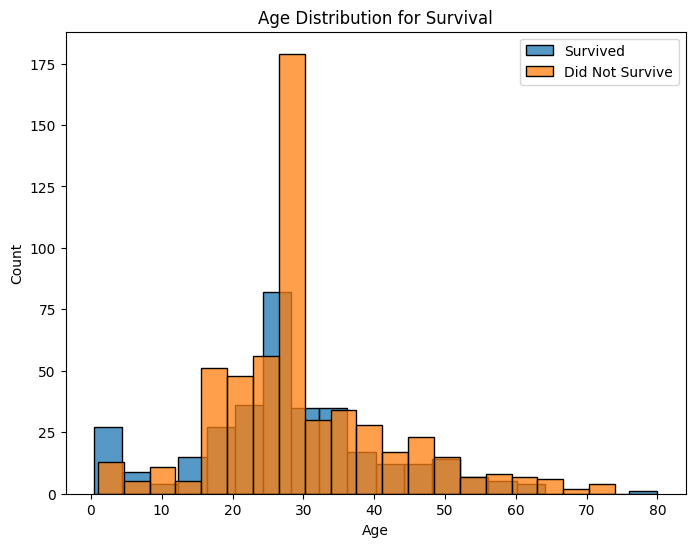

In [15]:
plt.figure(figsize=(8,6))
sns.histplot(data[data['Survived'] == 1]['Age'], bins=20, kde=False, label='Survived')
sns.histplot(data[data['Survived'] == 0]['Age'], bins=20, kde=False, label='Did Not Survive')
plt.legend()
plt.title('Age Distribution for Survival')
plt.show()

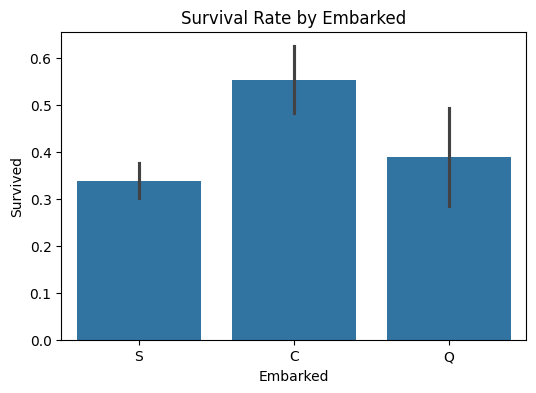

In [16]:
plt.figure(figsize=(6,4))
sns.barplot(x='Embarked', y='Survived', data=data)
plt.title('Survival Rate by Embarked')
plt.show()


In [17]:
data = data.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


### 성별을 0, 1로 변환

In [19]:
data['Sex'] = data['Sex'].map({'female': 0, 'male': 1})

### Embarked  컬럼에 One-Hot Encoding 적용

In [20]:
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)

In [21]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,False,True
1,1,1,0,38.0,1,0,71.2833,False,False
2,1,3,0,26.0,0,0,7.9250,False,True
3,1,1,0,35.0,1,0,53.1000,False,True
4,0,3,1,35.0,0,0,8.0500,False,True


In [22]:
correlation_matrix = data.corr()
survived_corr = correlation_matrix['Survived'].sort_values(ascending=False)
survived_corr

Survived      1.000000
Fare          0.257307
Parch         0.081629
Embarked_Q    0.003650
SibSp        -0.035322
Age          -0.064910
Embarked_S   -0.149683
Pclass       -0.338481
Sex          -0.543351
Name: Survived, dtype: float64

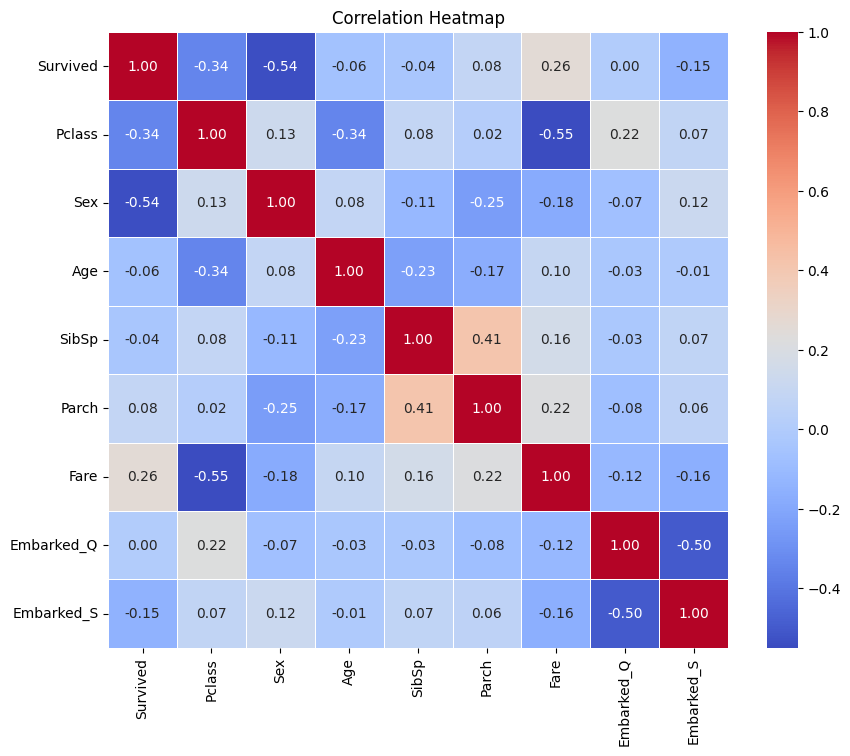

In [23]:
plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Heatmap')
plt.show()

In [24]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,False,True
1,1,1,0,38.0,1,0,71.2833,False,False
2,1,3,0,26.0,0,0,7.9250,False,True
3,1,1,0,35.0,1,0,53.1000,False,True
4,0,3,1,35.0,0,0,8.0500,False,True
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,False,True
887,1,1,0,19.0,0,0,30.0000,False,True
888,0,3,0,28.0,1,2,23.4500,False,True
889,1,1,1,26.0,0,0,30.0000,False,False


In [42]:
data['Family'] = data['SibSp']+data['Parch']

In [43]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Family
0,0,3,1,22.0,1,0,7.2500,False,True,1
1,1,1,0,38.0,1,0,71.2833,False,False,1
2,1,3,0,26.0,0,0,7.9250,False,True,0
3,1,1,0,35.0,1,0,53.1000,False,True,1
4,0,3,1,35.0,0,0,8.0500,False,True,0


In [44]:
data= data.drop(['SibSp', 'Parch'], axis=1)
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked_Q,Embarked_S,Family
0,0,3,1,22.0,7.2500,False,True,1
1,1,1,0,38.0,71.2833,False,False,1
2,1,3,0,26.0,7.9250,False,True,0
3,1,1,0,35.0,53.1000,False,True,1
4,0,3,1,35.0,8.0500,False,True,0


In [25]:
data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [26]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [27]:
from sklearn.linear_model import LogisticRegression

In [45]:
X=data.drop('Survived', axis=1)
y=data['Survived']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=8)

In [47]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
pred = log_reg.predict(X_test)

print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))


0.7597765363128491
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       108
           1       0.73      0.62      0.67        71

    accuracy                           0.76       179
   macro avg       0.75      0.74      0.74       179
weighted avg       0.76      0.76      0.76       179



C:\Users\5-11\miniforge3\envs\fintech\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [48]:
from imblearn.over_sampling import SMOTE

In [49]:
smote = SMOTE(random_state=24)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
log_reg = LogisticRegression()
log_reg.fit(X_train_smote, y_train_smote)
pred = log_reg.predict(X_test)

print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))


0.7374301675977654
              precision    recall  f1-score   support

           0       0.78      0.79      0.78       108
           1       0.67      0.66      0.67        71

    accuracy                           0.74       179
   macro avg       0.73      0.72      0.73       179
weighted avg       0.74      0.74      0.74       179



C:\Users\5-11\miniforge3\envs\fintech\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### smote를 사용해서 데이터 불균형을 해소했지만 오히려 성능이 더 떨어졌다.

### XGBoost, RandomForest 모델로 분석

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=8)

In [51]:
import xgboost as xgb

In [52]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
pred_xgb = xgb_model.predict(X_test)
print(accuracy_score(y_test, pred_xgb))
print(classification_report(y_test, pred_xgb))

0.8044692737430168
              precision    recall  f1-score   support

           0       0.84      0.83      0.84       108
           1       0.75      0.76      0.76        71

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
pred_rf = rf_model.predict(X_test)
print(accuracy_score(y_test, pred_rf))
print(classification_report(y_test, pred_rf))

0.8100558659217877
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       108
           1       0.75      0.79      0.77        71

    accuracy                           0.81       179
   macro avg       0.80      0.81      0.80       179
weighted avg       0.81      0.81      0.81       179



### 하이퍼파라미터 튜닝 추가

In [55]:
from sklearn.model_selection import RandomizedSearchCV

### XGBoost + RandomizedSearchCV

In [56]:
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

xgb_model = xgb.XGBClassifier()
random_search_xgb = RandomizedSearchCV(xgb_model, param_distributions=param_grid_xgb, n_iter=10, scoring='accuracy', cv=3, random_state=42)

random_search_xgb.fit(X_train, y_train)

best_xgb_model = random_search_xgb.best_estimator_

pred_xgb_best = best_xgb_model.predict(X_test)

print(accuracy_score(y_test, pred_xgb_best))
print(classification_report(y_test, pred_xgb_best))

0.7877094972067039
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       108
           1       0.78      0.65      0.71        71

    accuracy                           0.79       179
   macro avg       0.79      0.76      0.77       179
weighted avg       0.79      0.79      0.78       179



### RandomForest + RandomizedSearchCV

In [57]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'bootstrap': [True, False]
}

rf_model = RandomForestClassifier(random_state=42)

random_search_rf = RandomizedSearchCV(rf_model, param_distributions=param_grid_rf, n_iter=10, scoring='accuracy', cv=3, random_state=42)

random_search_rf.fit(X_train, y_train)
best_rf_model = random_search_rf.best_estimator_

pred_rf_best = best_rf_model.predict(X_test)

print(accuracy_score(y_test, pred_rf_best))
print(classification_report(y_test, pred_rf_best))

0.8324022346368715
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       108
           1       0.79      0.79      0.79        71

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



In [58]:
best_params = random_search_rf.best_params_

print("Best hyperparameters found by RandomizedSearchCV:")
print(best_params)


Best hyperparameters found by RandomizedSearchCV:
{'n_estimators': 100, 'max_depth': 10, 'bootstrap': True}
